# Preprocess and visualization of FBI NIBRS database

You'll find the entire database [here](https://www.dolthub.com/repositories/Liquidata/fbi-nibrs/data/main) to help to visualize the entire data.


## Preprocessing

It is needed to do a preprocessing on each state folder in order to have only lowercase in the folder and label name. The function `preprocess_files_in_directory()` directly modify the folder name and labels in each file.

### Alabama, as an example

In [ ]:
import os
import pandas as pd
import sys


sys.path.append(os.path.abspath("../data/"))

from FBI_preprocess_folder import preprocess_files_in_directory

# Define the base directory where Alabama data is stored
state_dir = '../../data/RAW/Alabama'

# Run the function to preprocess all files in the Alabama directory
preprocess_files_in_directory(state_dir)


Processed columns in file: ../../data/RAW/Alabama/AL-2015/nibrs_prop_desc_type.csv
Processed columns in file: ../../data/RAW/Alabama/AL-2015/nibrs_weapon_type.csv
Processed columns in file: ../../data/RAW/Alabama/AL-2015/nibrs_assignment_type.csv
Processed columns in file: ../../data/RAW/Alabama/AL-2015/ref_race.csv
Processed columns in file: ../../data/RAW/Alabama/AL-2015/nibrs_arrest_type.csv
Processed columns in file: ../../data/RAW/Alabama/AL-2015/nibrs_suspected_drug.csv
Processed columns in file: ../../data/RAW/Alabama/AL-2015/nibrs_age.csv
Processed columns in file: ../../data/RAW/Alabama/AL-2015/nibrs_injury.csv
Processed columns in file: ../../data/RAW/Alabama/AL-2015/nibrs_arrestee.csv
Processed columns in file: ../../data/RAW/Alabama/AL-2015/nibrs_victim_injury.csv
Processed columns in file: ../../data/RAW/Alabama/AL-2015/nibrs_prop_loss_type.csv
Processed columns in file: ../../data/RAW/Alabama/AL-2015/nibrs_ethnicity.csv
Processed columns in file: ../../data/RAW/Alabama/AL

### Merging interesting data

In [20]:
import os
import pandas as pd
import sys


sys.path.append(os.path.abspath("../data/"))

from FBI_merging import process_state_data

# Define the base directory where Alabama data is stored
state_dir = '../../data/RAW/Alabama'

# Define the output file
output_file = os.path.join(state_dir, 'Alabama_merged_data.csv')

# Process data for the state and save it
final_data = process_state_data(state_dir, output_file)


Data processed and saved to ../../data/RAW/Alabama/Alabama_merged_data.csv


In [21]:
final_data

,incident_id,incident_date,offense_type_id,arrestee_id,weapon_id,victim_id,injury_id,circumstances_id,year
0,77774048,2015-12-09 00:00:00,41,NaN,NaN,84717875,NaN,NaN,2015
1,77774049,2015-12-09 00:00:00,7,22258255.0,1.0,84717876,NaN,NaN,2015
2,77774050,2015-12-09 00:00:00,23,22258256.0,1.0,84717877,NaN,NaN,2015
3,77774051,2015-12-09 00:00:00,47,NaN,NaN,84717878,NaN,NaN,2015
4,77774052,2015-12-09 00:00:00,49,NaN,NaN,84717879,NaN,NaN,2015
...,...,...,...,...,...,...,...,...,...
577541,64306,1991-12-18 00:00:00,14,NaN,NaN,64306,NaN,NaN,1991
577542,64305,1991-12-19 00:00:00,14,NaN,NaN,64305,NaN,NaN,1991
577543,64303,1991-12-21 00:00:00,45,NaN,NaN,64303,NaN,NaN,1991
577544,64302,1991-12-23 00:00:00,49,NaN,NaN,64302,NaN,NaN,1991


### Some investigations

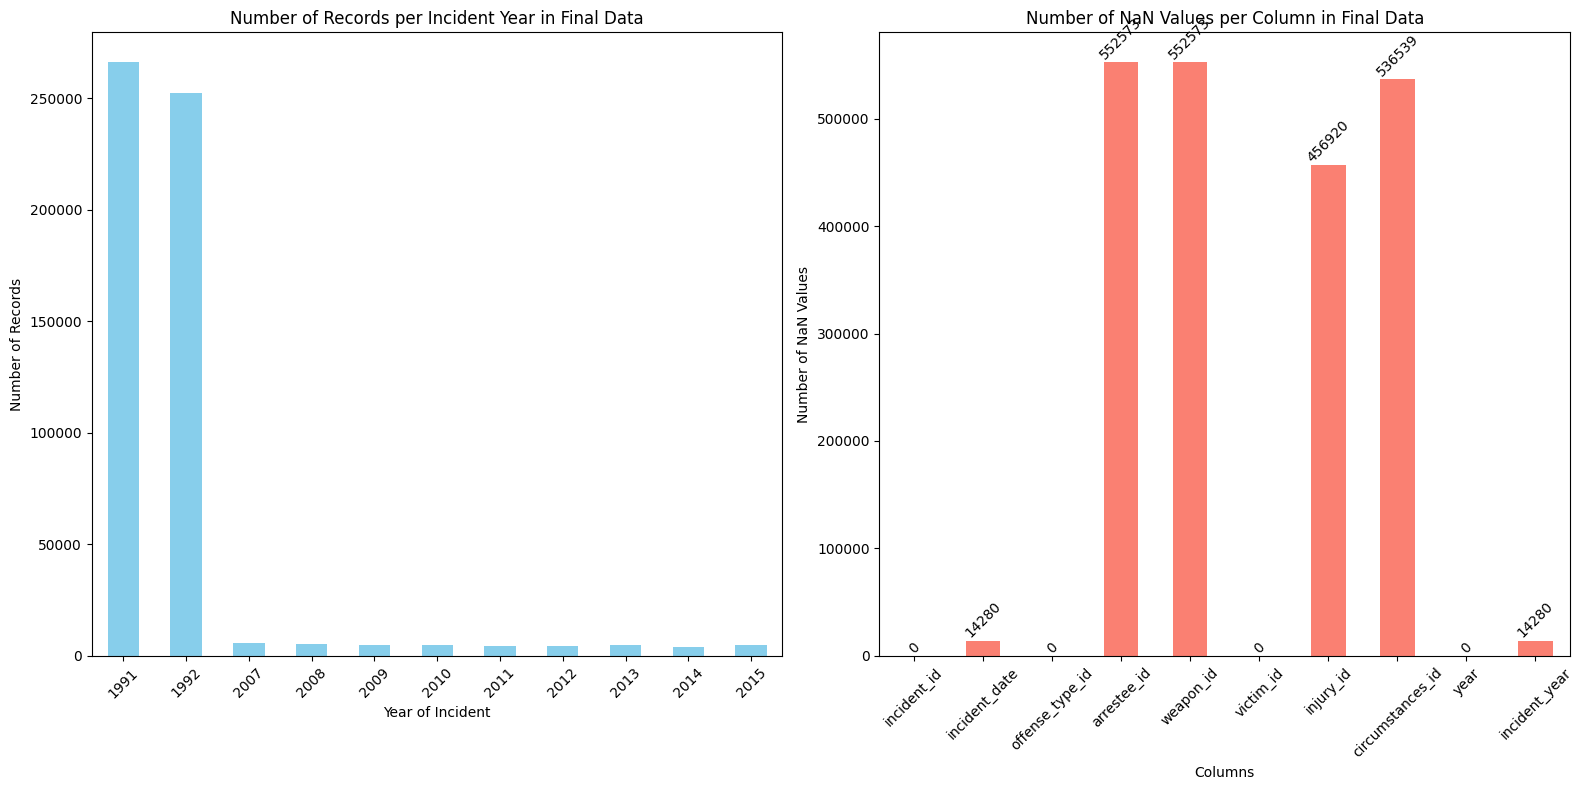

In [25]:
import matplotlib.pyplot as plt

# Ensure 'incident_date' is in datetime format
final_data['incident_date'] = pd.to_datetime(final_data['incident_date'], errors='coerce')

# Extract year from 'incident_date' and create a new 'incident_year' column
final_data['incident_year'] = final_data['incident_date'].dt.year.astype('Int64')

# Set up subplot for two plots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot 1: Bar plot of data per year based on 'incident_year'
year_counts = final_data['incident_year'].value_counts().sort_index()  # Count entries per incident year and sort by year
year_counts.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_xlabel('Year of Incident')
axes[0].set_ylabel('Number of Records')
axes[0].set_title('Number of Records per Incident Year in Final Data')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Plot 2: Bar plot of number of NaN values for each column
nan_counts = final_data.isna().sum()  # Count NaNs for each column
nan_counts.plot(kind='bar', color='salmon', ax=axes[1])
axes[1].set_xlabel('Columns')
axes[1].set_ylabel('Number of NaN Values')
axes[1].set_title('Number of NaN Values per Column in Final Data')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Add value labels on top of each bar in the NaN counts plot
for index, value in enumerate(nan_counts):
    axes[1].text(index, value, f'{value}', ha='center', va='bottom', fontsize=10, rotation=45)

# Adjust layout for better spacing between plots
plt.tight_layout()
plt.show()


#### Analysis Summary
From the bar plots, we observe the following:

1. **Data concentration in 1991 and 1992:**
   - The majority of the data is concentrated in the years 1991 and 1992, with very limited data for other years. This may limit the temporal analysis but provides a strong starting point for studying patterns in these two years.
   - Further investigation across other states might help fill in data gaps for a more comprehensive view.
2. **Missing `incident_date` values:**
   - A few `incident_date` values are missing, specifically 14280. Despite these missing dates, the remaining data is largely complete.
3. **Availability of `offense_type_id`:**
    - All offense types are available, which is good for categorizing offenses based on our criteria for violence. This will help us to classify offenses and filter incidents related to violent behavior.
4. **Missing Data for Specific Parameters:**
    - Four key columns (`arrestee_id`, `weapon_id`, `injury_id`, and `circumstances_id`) show a significant number of missing values, as indicated in the NaN count plot.
    - We hope additional data from other states can fill in some of these gaps. However, since offense types are available, we can still proceed with classification based on offenses alone.
5. **Insights on Weapons and Injuries:**
    - The weapon_id and injury_id columns, though missing some values, provide information on the type and severity of violence. While this missing data presents some limitations, the existing offense data could compensate.

So, despite some missing values in specific columns, the precise date of the incident, the available offense data and partial details on weapons and injuries can provide a solid foundation for analyzing violent incidents. We can refine our approach further as more data becomes available from additional states.

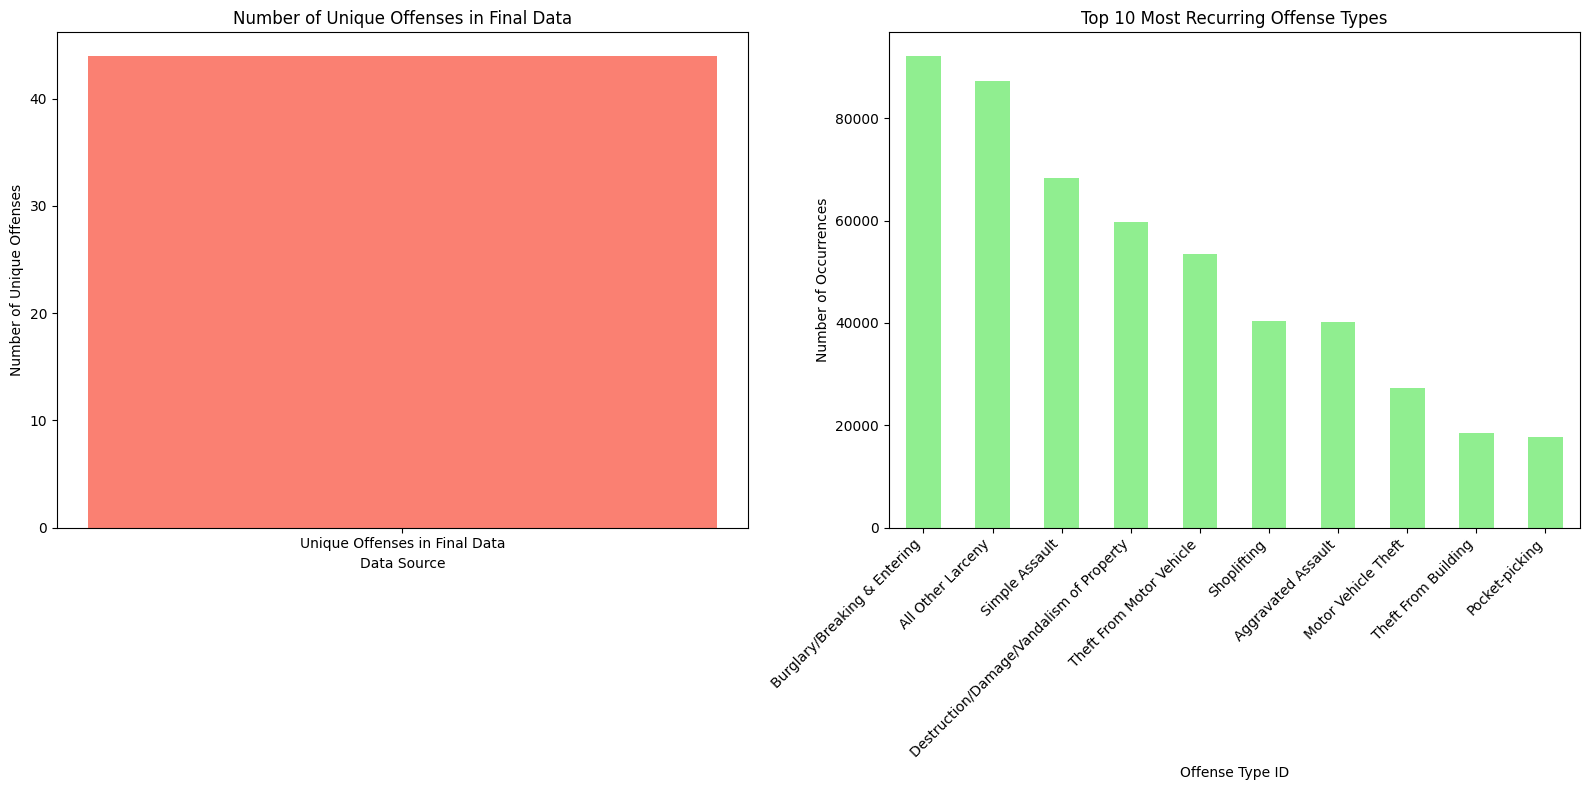

In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Assuming final_data is already loaded and contains the merged data
# with an 'offense_type_id' column

# Initialize a dictionary to map offense IDs to names
offense_id_to_name = {}

# Define the base directory where Alabama data is stored
base_dir = '../../data/RAW/Alabama'

# Collect offense names for IDs in final_data
if 'offense_type_id' in final_data.columns:
    # Get unique offense IDs in final_data
    unique_offenses_in_final_data = final_data['offense_type_id'].unique()

    # Loop through each year folder to get offense names for these unique IDs
    for folder in os.listdir(base_dir):
        if folder.startswith("AL-"):
            folder_path = os.path.join(base_dir, folder)
            offense_type_file = os.path.join(folder_path, 'nibrs_offense_type.csv')

            # Check if the offense type file exists
            if os.path.exists(offense_type_file):
                offense_data = pd.read_csv(offense_type_file)
                
                # Check for required columns
                if 'offense_type_id' in offense_data.columns and 'offense_name' in offense_data.columns:
                    # Filter only the offenses that are in final_data
                    filtered_data = offense_data[offense_data['offense_type_id'].isin(unique_offenses_in_final_data)]
                    offense_id_to_name.update(filtered_data.set_index('offense_type_id')['offense_name'].to_dict())

# Count the occurrences of each offense type in 'final_data'
top_offenses = pd.Series()
if 'offense_type_id' in final_data.columns:
    top_offenses = final_data['offense_type_id'].value_counts().head(10)  # Get the top 10 most recurring offenses

# Map the offense names for the top offenses
top_offenses_names = top_offenses.index.map(lambda x: offense_id_to_name.get(x, 'Unknown')).tolist()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot 1: Number of unique offenses in final_data
unique_offense_count = len(unique_offenses_in_final_data)
axes[0].bar(['Unique Offenses in Final Data'], [unique_offense_count], color='salmon')
axes[0].set_xlabel('Data Source')
axes[0].set_ylabel('Number of Unique Offenses')
axes[0].set_title('Number of Unique Offenses in Final Data')

# Plot 2: Most recurring offense types in final_data
if not top_offenses.empty:
    top_offenses.plot(kind='bar', ax=axes[1], color='lightgreen')
    axes[1].set_xlabel('Offense Type ID')
    axes[1].set_ylabel('Number of Occurrences')
    axes[1].set_title('Top 10 Most Recurring Offense Types')
    
    # Set offense names as x-axis labels
    axes[1].set_xticklabels(top_offenses_names, rotation=45, ha='right')

plt.tight_layout()
plt.show()


#### Analysis of Offense Types

From the bar plots, we can say:

1. **Unique offense types in `State_merged_data`:**
    - The first plot shows the number of unique offense types present in the `State_merged_data`, in our example Alabama. We observe that a subset of approximately 45 unique offenses is available in the data.
    - This means that the majority of incidents fall into well-defined and recurring offense categories. It will help us to categorize incidents reliably based on these established classifications.
2. **Top 10 Most Frequent Offense Types:**
    - The second plot displays the top 10 most frequently cited offense types in the dataset, along with their occurrence counts. Offenses like *Burglary/Breaking & Entering*, *All Other Larceny*, and *Simple Assault* are the most common.
    - These recurring offenses serve as strong indicators for our analysis, particularly for categorizing incidents as violent or non-violent.
  
In summary, the offenses available in the NIBRS data for Alabama are not only varied but also recurrent, which provides a reliable basis for violent incident classification. The top 10 offenses illustrate the primary incident types and should help us for further analysis focused on identifying patterns of violent behavior.